<a href="https://colab.research.google.com/github/shiyasAli/Netflix-movies-and-TV-shows-clustering/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
from nltk.corpus.reader import wordnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
!pip install pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/Colab Notebooks/Almabetter/unsupervised capstone/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df=pd.read_csv(file_path)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [25]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [67]:
year_df=df.copy()
year_df.dropna(axis=0,subset=['date_added'],inplace=True)
year_df['year_added']=year_df['date_added'].apply(lambda x: int(x[-4:]))
year_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


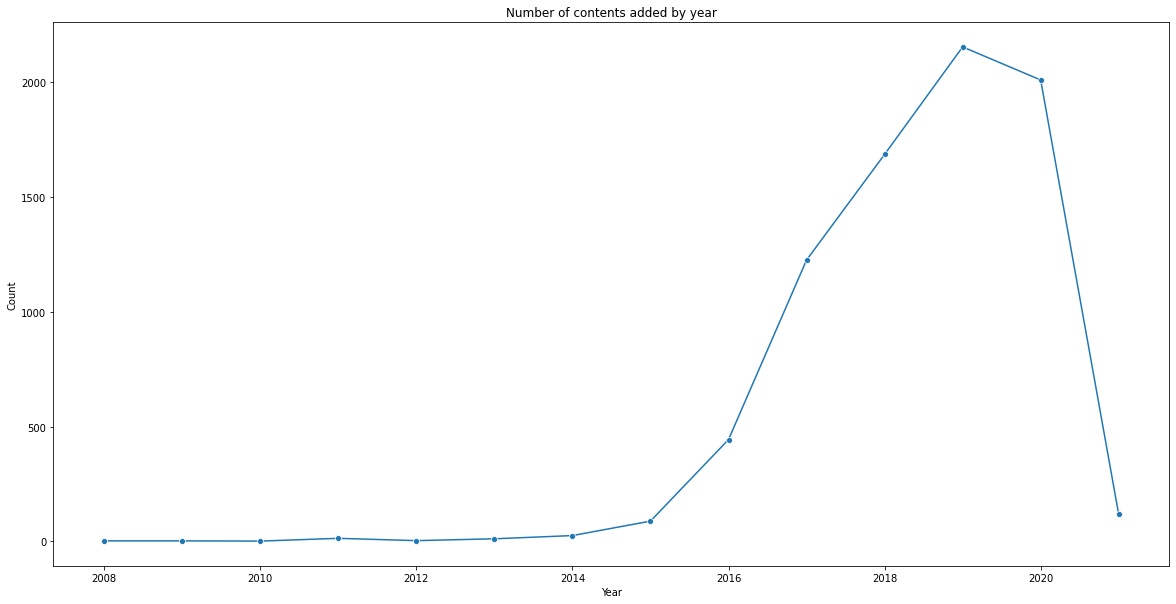

In [69]:
grouped_year_df=year_df.groupby('year_added')['show_id'].count().reset_index().rename(columns={'show_id':'Count'})
plt.figure(figsize=(20,10))
sns.lineplot('year_added','Count',data=grouped_year_df,marker='o')
plt.xlabel('Year')
plt.title('Number of contents added by year')
plt.show()

Text(0.5, 1.0, 'Distribution of content by year')

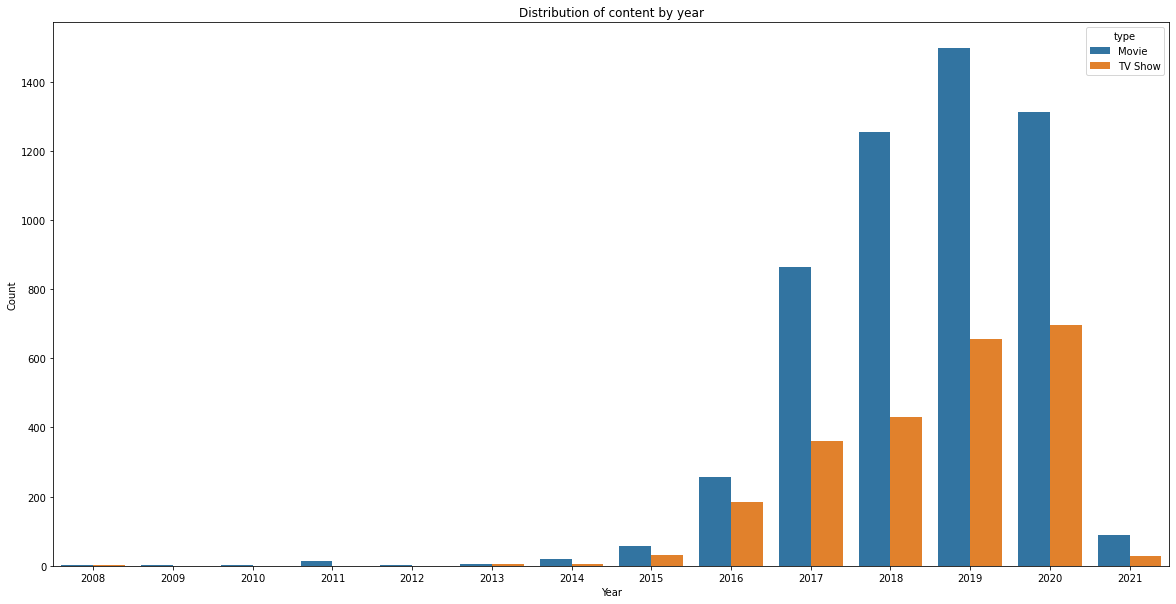

In [74]:
grouped_year_type_df=year_df.groupby(['year_added','type'])['show_id'].count().reset_index().rename(columns={'show_id':'Count'})
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.barplot(x='year_added',y='Count',hue='type',data=grouped_year_type_df)
plt.xlabel('Year')
plt.title('Distribution of content by year')

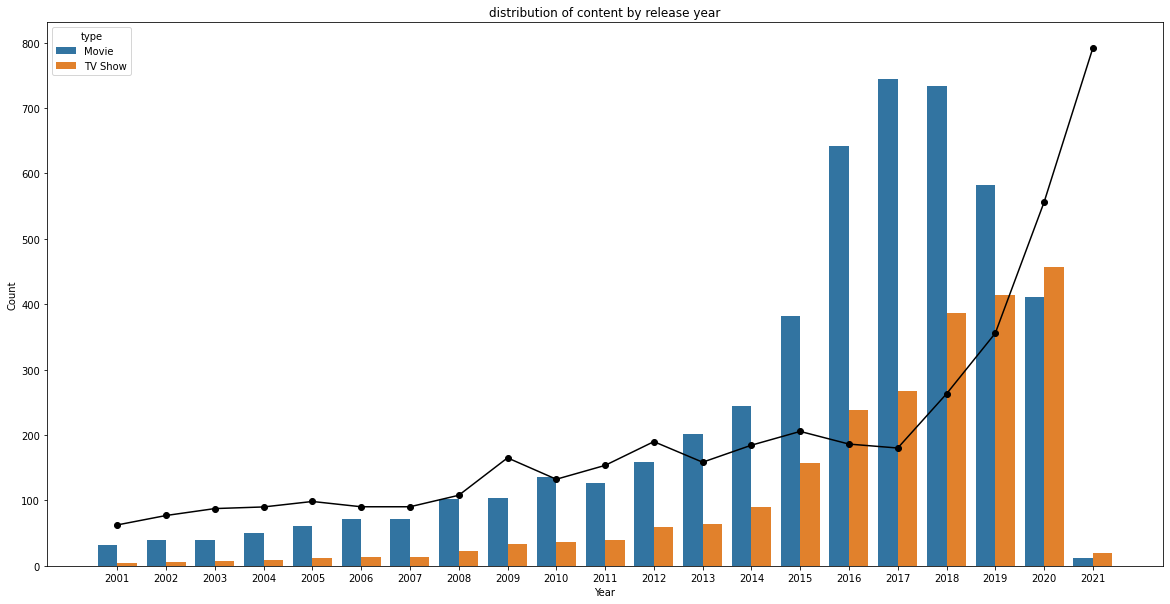

In [77]:
release_year_type_df=year_df[year_df['release_year']>2000].groupby(['release_year','type'])['show_id'].count().reset_index().rename(columns={'show_id':'Count'})
tv_movie_ratio=(release_year_type_df[release_year_type_df['type']!='Movie']['Count'].values/release_year_type_df[release_year_type_df['type']=='Movie']['Count'].values)*500
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
sns.barplot(x='release_year',y='Count',hue='type',data=release_year_type_df)
plt.plot(tv_movie_ratio,marker='o',color='black')
plt.xlabel('Year')
plt.title('distribution of content by release year')
plt.show()


In [4]:
def string_to_list(text):
  slist=text.split(',')
  for index in range(len(slist)):
    slist[index]=slist[index].strip()
  return slist
country_df=df.copy()
country_df.dropna(axis=0,subset=['country'],inplace=True)
country_df['country']=country_df['country'].apply(string_to_list)
country_df['listed_in']=country_df['listed_in'].apply(string_to_list)
country_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


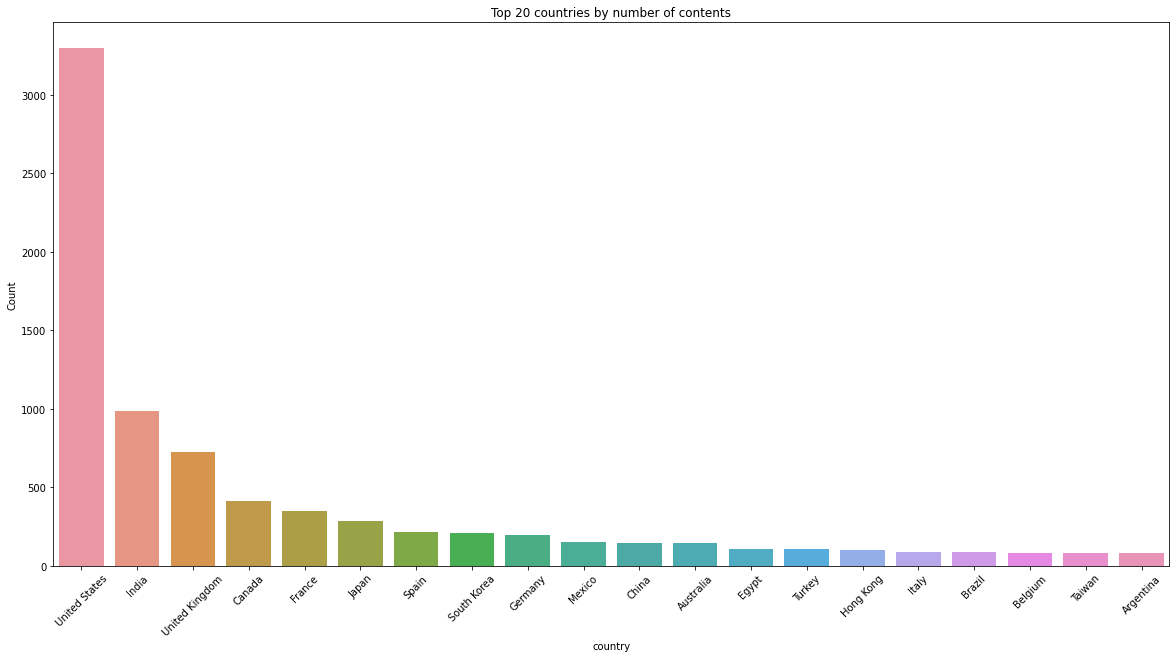

In [6]:
country_df_1=country_df.explode('country',ignore_index=True).groupby('country')['show_id'].count().reset_index().sort_values('show_id',ascending=False,ignore_index=True)
country_df_1.rename(columns={'show_id':'Count'},inplace=True)
top_20_country_df=country_df_1[0:20]
plt.figure(figsize=(20,10))
sns.barplot('country','Count',data=top_20_country_df)
plt.title('Top 20 countries by number of contents')
plt.xticks(rotation=45)
plt.show()

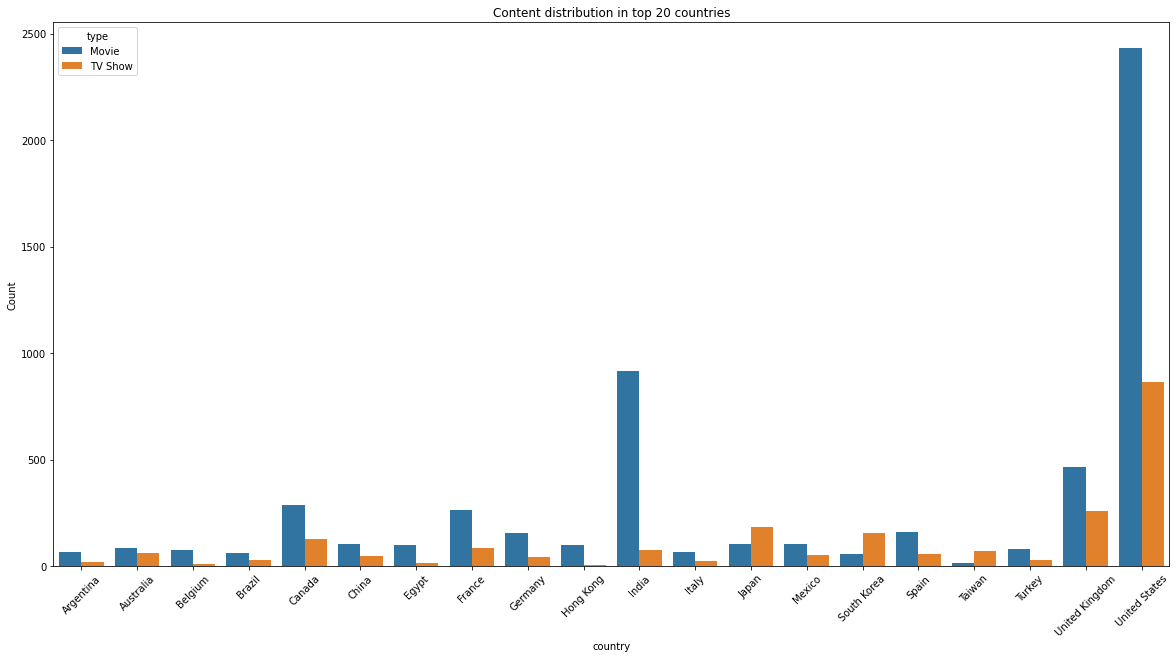

In [8]:
country_df_2=country_df.explode('country',ignore_index=True)
country_df_2_bool=country_df_2['country'].apply(lambda x :x in top_20_country_df['country'].values)
plt.figure(figsize=(20,10))
sns.barplot(x='country',y='Count',hue='type',data=country_df_2[country_df_2_bool].groupby(['country','type'])['show_id'].count().reset_index().rename(columns={'show_id':'Count'}))
plt.xticks(rotation=45)
plt.title('Content distribution in top 20 countries')
plt.show()


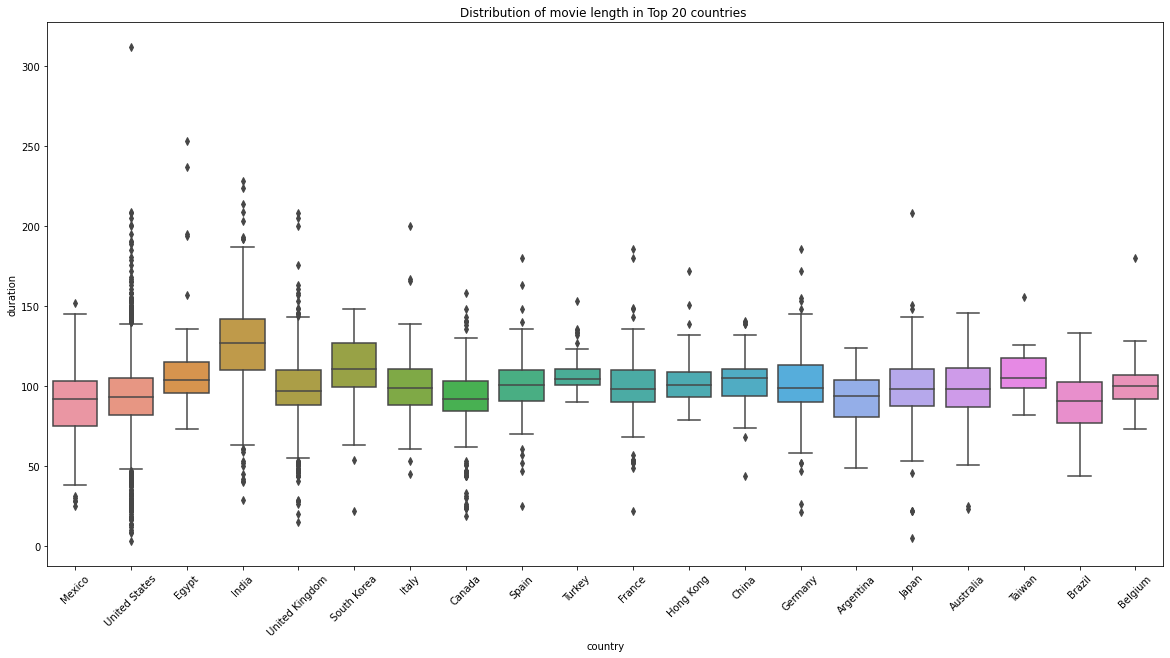

In [9]:
country_duration_df=country_df_2[country_df_2_bool][country_df_2[country_df_2_bool]['type']=='Movie']
def duration_converter(text):
  text=text[:-4]
  return int(text)
country_duration_df['duration']=country_duration_df['duration'].apply(duration_converter)
plt.figure(figsize=(20,10))
sns.boxplot(x='country',y='duration',data=country_duration_df)
plt.xticks(rotation=45)
plt.title('Distribution of movie length in Top 20 countries ')
plt.show()

In [11]:
cluster_df=df.copy()[['show_id','title','description']]
cluster_df.head()

,show_id,title,description
0,s1,3%,In a future where the elite inhabit an island ...
1,s2,7:19,After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"When an army recruit is found dead, his fellow..."
3,s4,9,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,A brilliant group of students become card-coun...


In [12]:
cluster_df['length']=cluster_df['description'].apply(lambda x: len(x))
cluster_df.head()

,show_id,title,description,length
0,s1,3%,In a future where the elite inhabit an island ...,136
1,s2,7:19,After a devastating earthquake hits Mexico Cit...,148
2,s3,23:59,"When an army recruit is found dead, his fellow...",149
3,s4,9,"In a postapocalyptic world, rag-doll robots hi...",145
4,s5,21,A brilliant group of students become card-coun...,143


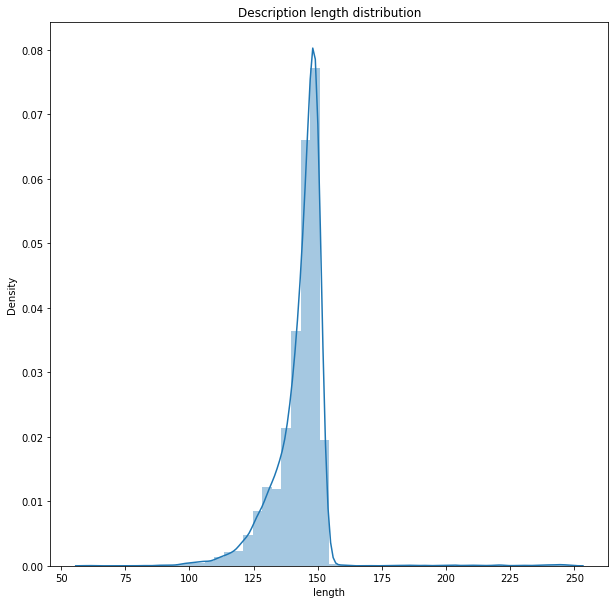

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(cluster_df['length'])
plt.title('Description length distribution')
plt.show()

In [14]:
def remove_punctuation(text):
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
cluster_df['description']=cluster_df['description'].apply(remove_punctuation)
cluster_df.head()

,show_id,title,description,length
0,s1,3%,In a future where the elite inhabit an island ...,136
1,s2,7:19,After a devastating earthquake hits Mexico Cit...,148
2,s3,23:59,When an army recruit is found dead his fellow ...,149
3,s4,9,In a postapocalyptic world ragdoll robots hide...,145
4,s5,21,A brilliant group of students become cardcount...,143


In [15]:
def lemmatizer(text):
  tokens=word_tokenize(text)
  def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
  lem=WordNetLemmatizer()
  text=' '.join([lem.lemmatize(w,get_wordnet_pos(w)) for w in tokens])
  return text
cluster_df['description']=cluster_df['description'].apply(lemmatizer)
cluster_df.head()

,show_id,title,description,length
0,s1,3%,In a future where the elite inhabit an island ...,136
1,s2,7:19,After a devastate earthquake hit Mexico City t...,148
2,s3,23:59,When an army recruit be found dead his fellow ...,149
3,s4,9,In a postapocalyptic world ragdoll robot hide ...,145
4,s5,21,A brilliant group of student become cardcounti...,143


In [16]:
def stop_words_remover(text):
  stop_words=set(stopwords.words('english'))
  word_list=text.split()
  word_list=[word for word in word_list if word.lower() not in stop_words]
  text=' '.join(word_list)
  return(text)
cluster_df['description']=cluster_df['description'].apply(stop_words_remover)
cluster_df.head()

,show_id,title,description,length
0,s1,3%,future elite inhabit island paradise far crowd...,136
1,s2,7:19,devastate earthquake hit Mexico City trap surv...,148
2,s3,23:59,army recruit found dead fellow soldier force c...,149
3,s4,9,postapocalyptic world ragdoll robot hide fear ...,145
4,s5,21,brilliant group student become cardcounting ex...,143


In [17]:
vectorizer=TfidfVectorizer(max_df=0.5,min_df=5,max_features=1000)
X=vectorizer.fit_transform(cluster_df['description'])
print('Dimension of vectorized matrix is {}'.format(X.shape))

Dimension of vectorized matrix is (7787, 1000)


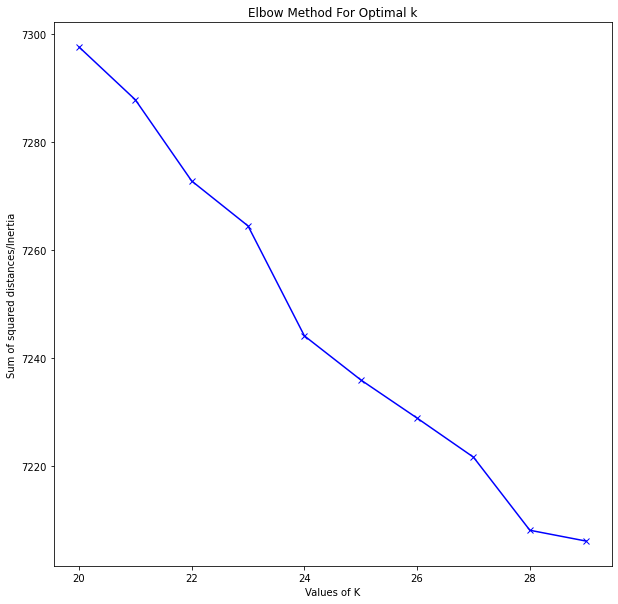

In [ ]:
cwss=[]
k=range(20,30)
for num_clusters in k:
  k_means=KMeans(n_clusters=num_clusters,random_state=42)
  k_means.fit(X)
  cwss.append(k_means.inertia_)
plt.figure(figsize=(10,10))
plt.plot(k,cwss,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

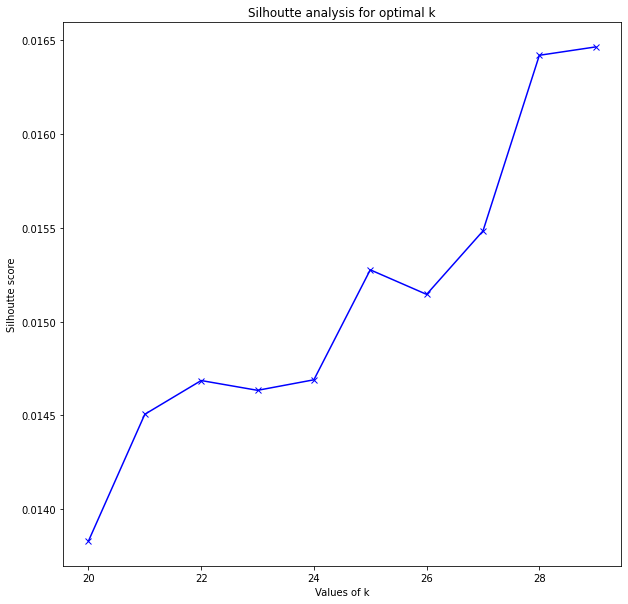

In [23]:
sil_score=[]
k=range(20,30)
for num_clusters in k:
  k_means=KMeans(n_clusters=num_clusters,random_state=42)
  k_means.fit(X)
  cluster_labels=k_means.labels_
  sil_score.append(silhouette_score(X,cluster_labels))
plt.figure(figsize=(10,10))
plt.plot(k,sil_score,'bx-')
plt.xlabel('Values of k')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte analysis for optimal k')
plt.show()

In [19]:
k_means=KMeans(n_clusters=28,random_state=42)
k_means.fit(X)
labels=k_means.labels_
print('Silhoutte score: {}\n'.format(silhouette_score(X,labels)))
print('Calinski Harabaz Index: {}\n'.format(calinski_harabasz_score(X.toarray(),labels)))
print('Davies Bouldin index: {}\n'.format(davies_bouldin_score(X.toarray(),labels)))

Silhoutte score: 0.01641870352239297

Calinski Harabaz Index: 18.90170072010403

Davies Bouldin index: 6.479735170358099



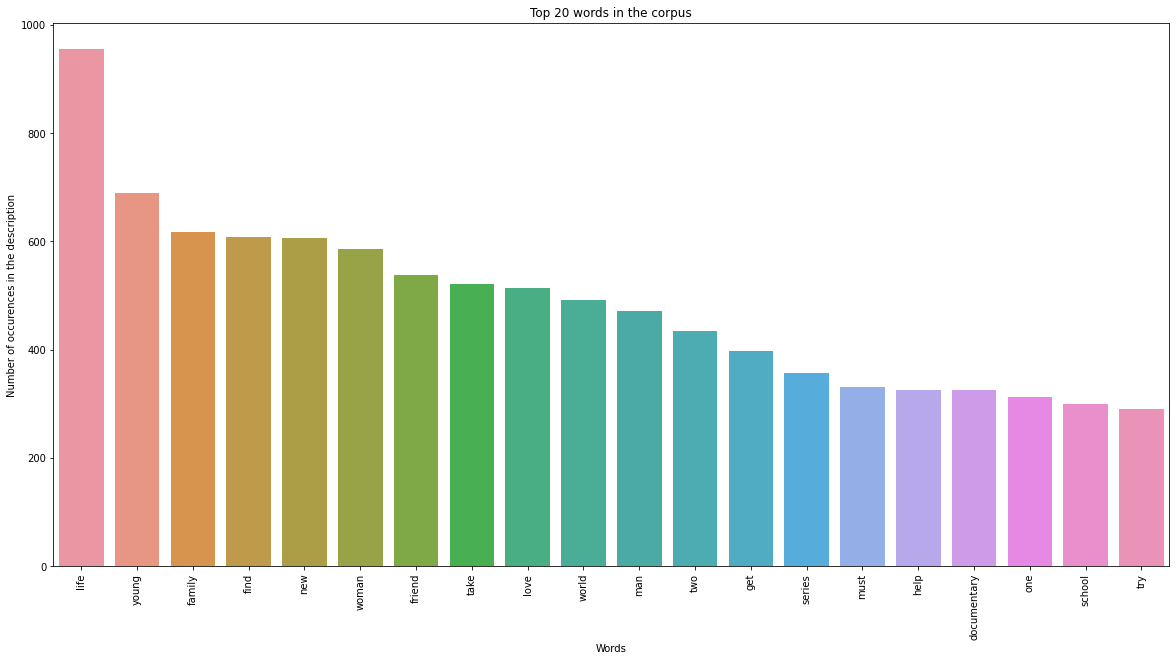

In [20]:
def top_words(corpus,count):
  vectorizer=CountVectorizer()
  vectorized_matrix=vectorizer.fit_transform(corpus)
  vectorized_sum=np.sum(vectorized_matrix,axis=0)
  top_indices=np.flip(np.argsort(vectorized_sum)[0,:],1)
  top_word_count=np.flip(np.sort(vectorized_sum)[0,:],1)
  top_word_matrix=np.zeros((count,vectorized_matrix.shape[1]))
  
  for i in range(count):
    top_word_matrix[i,top_indices[0,i]]=1
  
  top_words=[word[0].encode('ascii').decode('utf-8') for word in vectorizer.inverse_transform(top_word_matrix)]
  
  return (top_words,top_word_count[0,:count].tolist()[0])

top_words,top_word_count=top_words(corpus=cluster_df['description'],count=20)
plt.figure(figsize=(20,10))
sns.barplot(top_words,top_word_count)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Number of occurences in the description')
plt.title('Top 20 words in the corpus')
plt.show()


In [21]:
count_vectorizer=CountVectorizer(max_features=5000)
document_term_matrix=count_vectorizer.fit_transform(cluster_df['description'])
grid_params = {'n_components' : list(range(5,10))}
lda=LatentDirichletAllocation()
lda_model=GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(document_term_matrix)
best_model=lda_model.best_estimator_
print('Best lda model param: {}'.format(best_model))


Best lda model param: LatentDirichletAllocation(n_components=5)


In [22]:
lda_dashboard=pyLDAvis.sklearn.prepare(best_model,document_term_matrix,count_vectorizer)
lda_dashboard

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.052221 -0.130108       1        1  27.117352
2      0.056914  0.142988       2        1  19.710683
1      0.125885 -0.017722       3        1  17.978636
4     -0.147379 -0.021958       4        1  17.736026
3     -0.087642  0.026800       5        1  17.457304, topic_info=             Term        Freq       Total Category  logprob  loglift
4984        young  657.000000  657.000000  Default  30.0000  30.0000
2563         love  490.000000  490.000000  Default  29.0000  29.0000
1213  documentary  309.000000  309.000000  Default  28.0000  28.0000
4914        woman  559.000000  559.000000  Default  27.0000  27.0000
3782       series  339.000000  339.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
4933        world   63.382897  467.940083   Topic5  -5.5779  -0.2537
1744       friend   59.805428  513.680946   Topic5  -5.6360  -0.4051
2507         life   65.545107  909.564302   Topic5  -5.5443  -0.8848
2837       murder   49.023007  230.130728   Topic5  -5.8348   0.1991
4099        story   49.551053  277.149825   Topic5  -5.8241   0.0239

[415 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
10        2  0.950479       13
24        2  0.110746    1960s
24        5  0.830598    1960s
60        3  0.936460       80
78        1  0.039019    abuse
...     ...       ...      ...
4984      2  0.015199    young
4984      3  0.165667    young
4984      4  0.024318    young
4984      5  0.045597    young
4987      5  0.920143  youtube

[839 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

In [24]:
print('loglikelihood score of the model: {}'.format(lda_model.best_score_))

loglikelihood score of the model: -176445.86320530745
